In [1]:
import tensorflow as tf

In [2]:
%matplotlib inline
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
cat1 = Image.open("images/cat1.jpg")
cat2 = Image.open("images/cat2.jpg")

In [4]:
np_cat1 = np.asarray(cat1)
np_cat2 = np.asarray(cat2)

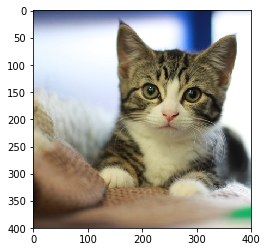

In [5]:
plt.imshow(np_cat1);

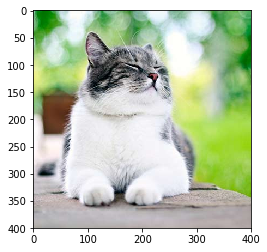

In [6]:
plt.imshow(np_cat2);

In [7]:
np_cat = np.stack([np_cat1, np_cat2], axis=0)
np_cat.shape

(2, 400, 400, 3)

In [28]:
tf.reset_default_graph()
%run affinetransformer.py
sess = tf.InteractiveSession()

# 뻥튀기. tf 에서는 reshape 으로 이게 안 되서 tile 을 사용한다.
# 되는게 이상..
def affine_transform_matrix(M, batch_size):
    return np.resize(M, (batch_size, 2, 3))

# M = np.array([[1., 0., 0.], [0., 1., 0.]])
M = np.array([[0.707, -0.707, 0.], [0.707, 0.707, 0.]])
M = affine_transform_matrix(M, 2)
transformer = AffineTransformer(np_cat, M)

In [29]:
res = transformer.transform.eval()

In [30]:
res.shape

(2, 400, 400, 3)

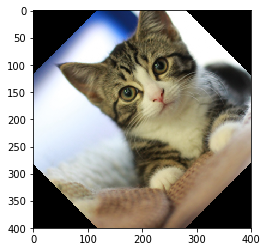

In [31]:
plt.imshow(res[0].astype(np.uint8));

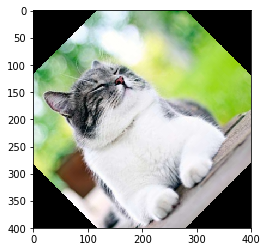

In [32]:
plt.imshow(res[1].astype(np.uint8));